<a href="https://colab.research.google.com/github/lucazappaterra/PhysLab-II---CYGNO/blob/main/trc_format_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parsing dei file in uscita dall'oscilloscopio con LecroyParser

Installiamo lecroyparser, va fatto ogni volta su Colab

In [ ]:
!pip install lecroyparser

Importiamo le librerie

In [ ]:
import lecroyparser
import matplotlib.pyplot as plt
import os

Scarichiamo i dati dalla repo su GitHub, e unzippiamoli (vanno caricati compressi per fare questa cosa). \\
Imho molto più comodo rispetto che a caricare la roba su colab ogni volta.

In [ ]:
!wget https://github.com/lucazappaterra/PhysLab-II---CYGNO/raw/main/pmt-xxx.zip
!unzip pmt-xxx.zip 

--2022-03-21 17:55:06--  https://github.com/lucazappaterra/PhysLab-II---CYGNO/raw/main/pmt-xxx.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lucazappaterra/PhysLab-II---CYGNO/main/pmt-xxx.zip [following]
--2022-03-21 17:55:06--  https://raw.githubusercontent.com/lucazappaterra/PhysLab-II---CYGNO/main/pmt-xxx.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2759 (2.7K) [application/zip]
Saving to: ‘pmt-xxx.zip’

pmt-xxx.zip         100%[===================>]   2.69K  --.-KB/s    in 0s      

2022-03-21 17:55:07 (55.7 MB/s) - ‘pmt-xxx.zip’ saved [2759/2759]

Archive:  pmt-xxx.zip
   creat

Giusto per vedere le cartelle nella directory facciamo un bel !ls

In [ ]:
!ls

__MACOSX  pmt-xxx  pmt-xxx.zip	sample_data


Impostiamo il percorso (andrà cambiato di volta in volta) e creiamo una variabile ' files ' che ci servirà dopo per il loop

In [ ]:
path='pmt-xxx/'
files = os.listdir(path)

E ora un bel loop sui file, stampando qualche info e plottando quello che c'è dentro. \\
**N.B.:** in questo caso c'è un file, .DS_Store , che non so se ci sarà in ogni caso, ma va skippato perché altrimenti LecroyParser non sa che farci e impazzisce.

0 C1--900V-15mV--00000.trc
Le Croy Scope Data
Path: None - from bytes data
Endianness: <
Instrument: LECROYWS4104HD
Instrument Number: 18165
Template Name: LECROY_2_3
Channel: Channel 1
WaveArrayCount: 502
Vertical Coupling: DC50
Bandwidth Limit: off
Record Type: single_sweep
Processing: No Processing
TimeBase: 20 ns/div
TriggerTime: 2022-03-18 00:09:22.36

Peaks' index: 102.0
Peaks in this batch: 1.0



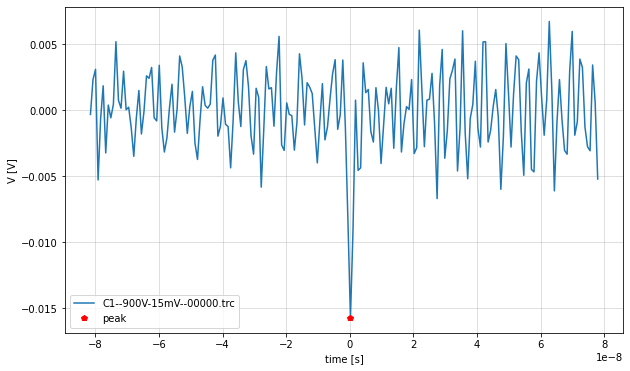

1 C1--900V-15mV--00001.trc
Le Croy Scope Data
Path: None - from bytes data
Endianness: <
Instrument: LECROYWS4104HD
Instrument Number: 18165
Template Name: LECROY_2_3
Channel: Channel 1
WaveArrayCount: 502
Vertical Coupling: DC50
Bandwidth Limit: off
Record Type: single_sweep
Processing: No Processing
TimeBase: 20 ns/div
TriggerTime: 2022-03-18 00:09:44.95

Peaks' index: 102.0
Peaks in this batch: 1.0



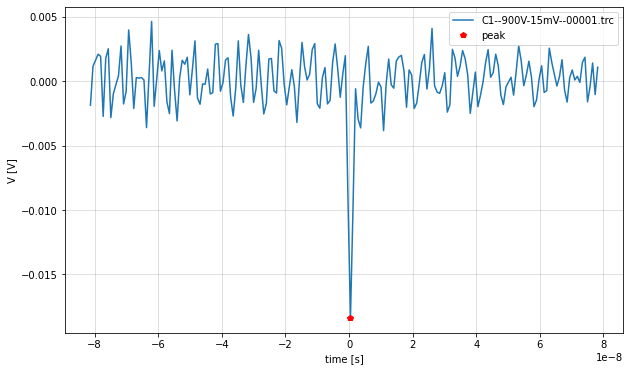

In [76]:
from scipy import signal
import numpy as np
peaks = np.zeros(len(files))
peakpos = np.zeros(len(files))
usample=200
for i,filename in enumerate(files):
    print(i,filename)
    
    #if(i==2): pass # .Ds_Store 
    #else:
    f = open(path+filename, 'rb')
    data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                   # we can't go further than the "WaveArrayCount"
    print(data)

    # let's find and print the number of peaks in the batch
    peaks[i] = len(signal.find_peaks(-1*data.y, prominence=0.015)[0])
    peakpos[i] = signal.find_peaks(-1*data.y, prominence=0.015)[0]
    print(f"Peaks' index: {peakpos[i]}")
    print(f'Peaks in this batch: {peaks[i]}\n')

    # now let's plot some stuff
    plt.figure(figsize=(10,6))
    plt.plot(data.x, data.y, label=filename)
    plt.plot(data.x[int(peakpos[i])], data.y[int(peakpos[i])], 'p', color='red', label='peak')
    plt.grid(alpha=.5)
    plt.xlabel('time [s]')
    plt.ylabel('V [V]')
    plt.legend()
    f.close()
    plt.show()
    #break

1
(array([81]), {'prominences': array([0.01706101]), 'left_bases': array([68]), 'right_bases': array([115])})


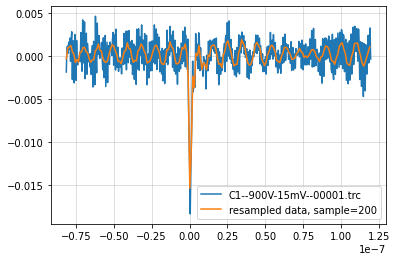

1
(array([81]), {'prominences': array([0.01706101]), 'left_bases': array([68]), 'right_bases': array([115])})


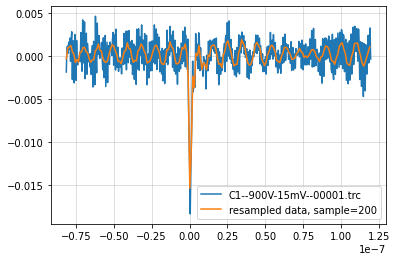

In [ ]:
from scipy import signal
data = lecroyparser.ScopeData(path+filename)
peaks = np.zeros(len(files))
for i in enumerate(files):
    plt.plot(data.x, data.y, label=filename)
    data_rs = signal.resample(data.y, usample, data.x)
    #peaks[i] = len(signal.find_peaks(data_rs[1])[0])
    #print(len(signal.find_peaks(-1*data_rs[0], prominence=0.01)[0]))
    #print(signal.find_peaks(-1*data_rs[0], prominence=0.01))
    #print(f'Peaks in this batch: {peaks[i]}\n')
    plt.plot(data_rs[1], data_rs[0], label=f'resampled data, sample={usample}')
    plt.legend()
    plt.grid(alpha=.5)
    plt.show()

In [ ]:
print(data.verticalGain, data.timeBase, data.horizOffset, data.verticalOffset)
str(data)[str(data).find('Processing:'):str(data).find('\nTimeBase:')] # this prints out only partial informations contained in data, 
                                                                       # which can be accessed unformatted via 'str(data)' alone
#str(data)

1.47055e-06 20 ns/div -8.131639999999998e-08 0.018


'Processing: No Processing'

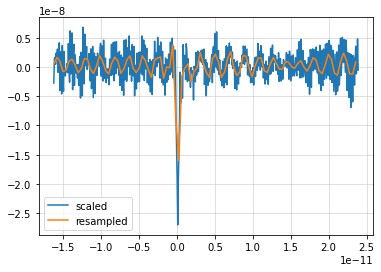

In [ ]:
a = data.y *  data.verticalGain
t = data.x *  float(data.timeBase.split(' ')[0]) * 10e-6 # da mettere a posto con varie scale
plt.plot(t, a, label='scaled')
data_rs = signal.resample(a, usample, t)
plt.plot(data_rs[1], data_rs[0], label='resampled')
plt.legend()
plt.grid(alpha=.5)
plt.show()